<a href="https://colab.research.google.com/github/geethatathireddy/Zomato-Restaurant-Clustering-And-Sentiment/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.
Attribute Information
Zomato Restaurant names and Metadata

Use this dataset for clustering part

    Name : Name of Restaurants

    Links : URL Links of Restaurants

    Cost : Per person estimated Cost of dining

    Collection : Tagging of Restaurants w.r.t. Zomato categories

    Cuisines : Cuisines served by Restaurants

    Timings : Restaurant Timings

# **Zomato Restaurant reviews**

Merge this dataset with Names and Matadata and then use for sentiment analysis part

    Restaurant : Name of the Restaurant

    Reviewer : Name of the Reviewer

    Review : Review Text

    Rating : Rating Provided by Reviewer

    MetaData : Reviewer Metadata - No. of Reviews and followers

    Time: Date and Time of Review

    Pictures : No. of pictures posted with review



In [ ]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(10,6)})
plt.rcParams['figure.figsize'] = [10,6]

# importing data files 
meta_df = pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Data/Zomato%20Restaurant%20names%20and%20Metadata.csv')
reviews_df = pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Data/Zomato%20Restaurant%20reviews.csv')



# to get the first five rows of the data set 
meta_df.head()



,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# to get the information about the data
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# finding the count of null values
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Observation : we have 54 null Values in collection Column

In [ ]:
# to get the description of the data
meta_df.describe().transpose()

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [ ]:
#checking for duplicate entries
print(len(meta_df.drop_duplicates()))
print(len(meta_df['Name'].drop_duplicates()))

105
105


In [ ]:
# checking dType and non null values
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# checking for unique values in cost function
meta_df.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [ ]:
# changing the data type of the cost function
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

# **Reviews**

In [ ]:
# to get the first five rows of the data set 
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# to get the information about the data
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
# finding the count of null values
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

observation : we can see here there is one rating filled as category i.e 'Like'

In [ ]:
# substitutiong 'like' observation first by nan values ans then by mean of the feature 
reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')
print(reviews_df['Rating'].mean())

3.601044071880333


In [ ]:
# since the mean is 3.6 we will round off it by 3.5
reviews_df['Rating'].fillna(3.5,inplace=True)

In [ ]:
# feature engineering the data
reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9999 non-null   object        
 1   Reviewer    9961 non-null   object        
 2   Review      9954 non-null   object        
 3   Rating      10000 non-null  float64       
 4   Time        9961 non-null   datetime64[ns]
 5   Pictures    9999 non-null   float64       
 6   Reviews     9961 non-null   float64       
 7   Followers   8383 non-null   float64       
 8   Year        9961 non-null   float64       
 9   Month       9961 non-null   float64       
 10  Hour        9961 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 859.5+ KB


In [ ]:
#checking for null values
reviews_df.isna().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

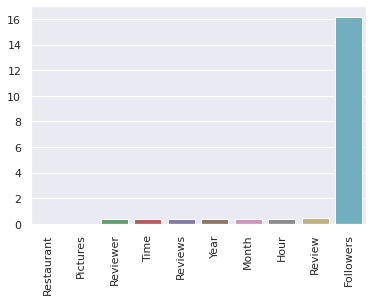

In [ ]:
# creating function to find the percentage missing vales 
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

percent_nan = percent_missing(reviews_df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

observation : Followers columns has large number of mising values

(0.0, 1.0)

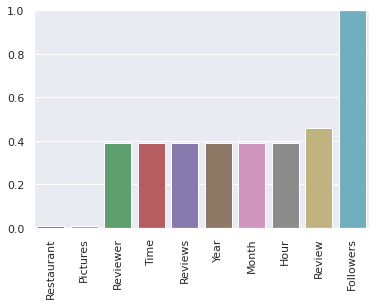

In [ ]:
# checking for missing value colums which are less than 1 percent
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
# Set 1% Threshold
plt.ylim(0,1)

In [ ]:
percent_nan[percent_nan < 1]

Restaurant    0.01
Pictures      0.01
Reviewer      0.39
Time          0.39
Reviews       0.39
Year          0.39
Month         0.39
Hour          0.39
Review        0.46
dtype: float64

observation : since most of the column missing percentage is 0.39% so, it quite possible that same row of each column is having null value, if so we can remove those row, lets check it...

In [ ]:
# Checking null values observation in Restaurant feature
reviews_df[reviews_df['Restaurant'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking null values observation in Pictures feature
reviews_df[reviews_df['Pictures'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking null values observation in Reviewer feature
reviews_df[reviews_df['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8777,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8778,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8779,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8780,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8781,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8782,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8783,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8784,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8785,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking null values observation in Followers feature
reviews_df[reviews_df['Followers'].isna()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5.0,2019-05-24 15:22:00,0.0,1.0,NaN,2019.0,5.0,15.0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5.0,2019-05-24 01:02:00,0.0,1.0,NaN,2019.0,5.0,1.0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4.0,2019-05-23 15:01:00,0.0,1.0,NaN,2019.0,5.0,15.0
14,Beyond Flavours,Kankaria.ritu,"We ordered corn cheese balls, manchow soup and...",1.0,2019-05-22 21:19:00,0.0,1.0,NaN,2019.0,5.0,21.0
24,Beyond Flavours,Amritap Datta,"Excellent experience, mouthwatering food, good...",5.0,2019-05-20 23:33:00,0.0,1.0,NaN,2019.0,5.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...
9912,Chinese Pavilion,Anil Rao,The tofu with mushrooms was absolutely wonderf...,5.0,2019-04-04 02:15:00,0.0,9.0,NaN,2019.0,4.0,2.0
9918,Chinese Pavilion,Ajay Munjal,The food is delicious. Service is excellent. I...,5.0,2019-02-16 13:56:00,0.0,4.0,NaN,2019.0,2.0,13.0
9933,Chinese Pavilion,Korak Mukherjee,I was here last night with 2 of my friends. We...,1.0,2018-05-29 16:02:00,1.0,9.0,NaN,2018.0,5.0,16.0
9940,Chinese Pavilion,Anubinda Dash,The food was amazing. Do not forget to try 'Mo...,4.5,2018-03-02 19:54:00,10.0,11.0,NaN,2018.0,3.0,19.0


In [ ]:
# finning the nan values of followers by 0
reviews_df['Followers'].fillna(0,inplace=True)

# since all the data is cleaned and the missing data is common for all the features we can drop them all
reviews_df.dropna(inplace=True)

# checking null values in the data set 
reviews_df.isnull().sum()



Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

# **EDA**


# **Meta Data**

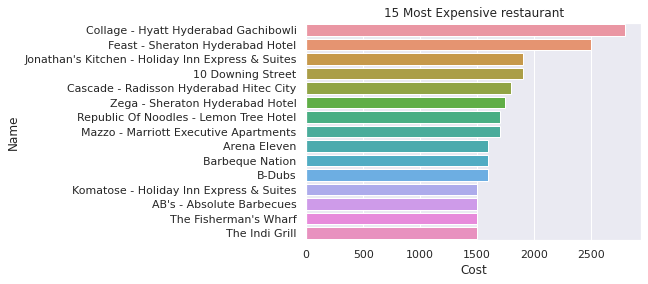

In [ ]:
# checking for most expensive Restaurant
sns.barplot(x='Cost',
            y="Name", 
            data=meta_df, 
            order=meta_df.sort_values('Cost',ascending=False).Name[:15])

plt.title('15 Most Expensive restaurant')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

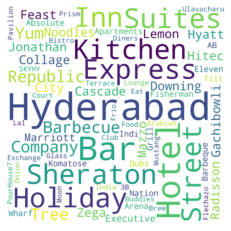

In [ ]:
#Creating the text variable

text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

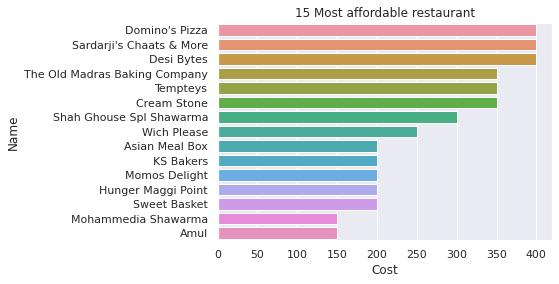

In [ ]:
# checking for most affordable Restaurant
sns.barplot(x='Cost',
            y="Name", 
            data=meta_df, 
            order=meta_df.sort_values('Cost',ascending=False).Name[-15:])

plt.title('15 Most affordable restaurant')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

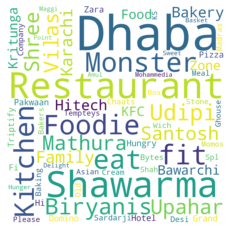

In [ ]:
#Creating the text variable

text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[-30:])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [ ]:
# lets find the most cusines offered by Restaurants
meta_df.Cuisines

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [ ]:
# spliting the cusines and storing in list 
cuisine_list=meta_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

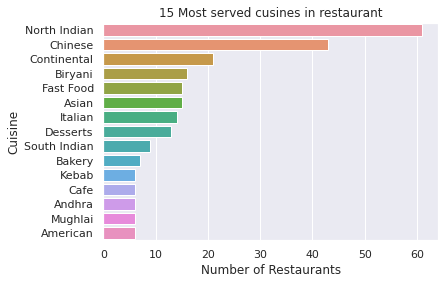

In [ ]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1

# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

# graph for most cusines served in restaurant
sns.barplot(y='Cuisine',
            x="Number of Restaurants", 
            data=cuis_df, 
            order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in restaurant')
plt.show()



In [ ]:
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

(-0.5, 1399.5, 1399.5, -0.5)

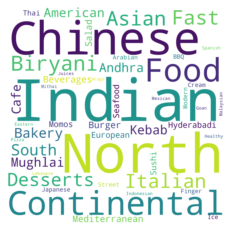

In [ ]:
#Creating the text variable

text = " ".join(name for name in meta_df.Cuisines )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [ ]:
# spliting the cusines and storing in list 
Collections_list=meta_df.Collections.dropna().str.split(', ')
Collections_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

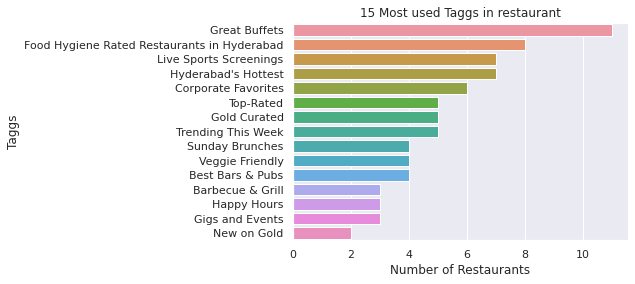

In [ ]:
# storing all the cusines in a dict 
Collections_dict = {}
for names in Collections_list:
    for name in names:
        if (name in Collections_dict):
            Collections_dict[name]+=1
        else:  
            Collections_dict[name]=1

# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Taggs',0:'Number of Restaurants'})

# graph for most cusines served in restaurant
sns.barplot(y='Taggs',
            x="Number of Restaurants", 
            data=Collections_df, 
            order=Collections_df.sort_values('Number of Restaurants',ascending=False).Taggs[:15])
plt.title('15 Most used Taggs in restaurant')
plt.show()



(-0.5, 1399.5, 1399.5, -0.5)

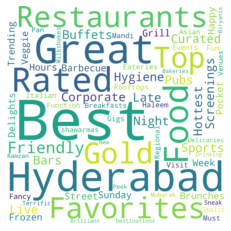

In [ ]:
#Creating the text variable

text = " ".join(name for name in Collections_df.Taggs )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")


# **Reviews**

In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


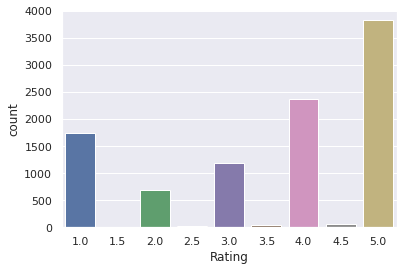

In [ ]:
sns.countplot(reviews_df.Rating)

**lets find the restaurant with best reviews**

In [ ]:
reviews_df

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,2016-06-05 00:08:00,0.0,53.0,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2016-06-04 22:01:00,0.0,2.0,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,2016-06-03 10:37:00,3.0,65.0,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,2016-05-31 17:22:00,0.0,13.0,144.0,2016.0,5.0,17.0


In [ ]:
df_rating = reviews_df.groupby(['Restaurant']).agg({'Rating':'mean','Restaurant':'count'}).rename(columns={'Restaurant':'number_of_rating'}).reset_index()
df_rating.describe()

,Rating,number_of_rating
count,100.000000,100.00000
mean,3.601891,99.54000
std,0.508100,2.73924
min,2.400000,77.00000
25%,3.245000,100.00000
50%,3.613081,100.00000
75%,3.846250,100.00000
max,4.880000,100.00000


**looks like we got 100 rating for all the restaurants**

Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

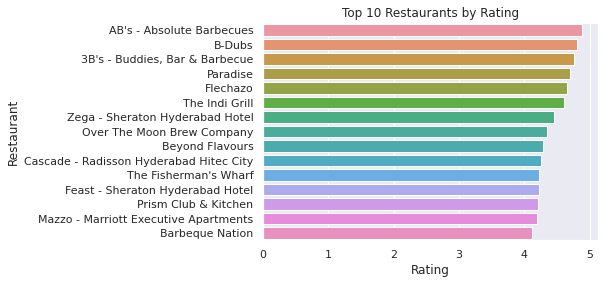

In [ ]:
sns.barplot(data=df_rating, x='Rating', y='Restaurant', order=df_rating.sort_values('Rating',ascending=False).Restaurant[:15])
plt.title('Top 10 Restaurants by Rating')

In [ ]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Followers':'sum','Rating':'mean'}).reset_index()
most_famous_reviewer=df_Reviewer[(df_Reviewer['Followers'] > 10000)&(df_Reviewer['Reviews']>100)&(df_Reviewer['Rating']>3.5)]
most_famous_reviewer

,Reviewer,Reviews,Followers,Rating
56,Aanchal Khemka,945.0,11605.0,3.600000
903,Asad Rana,1086.0,12306.0,3.666667
1019,Avin Seth,1576.0,11064.0,4.500000
1285,Buddiga Sindhuri,300.0,10033.0,4.200000
1768,Food Nawabs,520.0,22129.0,4.000000
1786,Foodies Hyderabad,124.0,37976.0,4.500000
2173,Hungry Eyes,208.0,10258.0,5.000000
2816,Kunal Khanra,756.0,11440.0,4.750000
3480,Namit Agarwal,1253.0,13139.0,3.857143
4496,Rajat Goel ✳️,444.0,10149.0,4.000000


In [ ]:
df_Reviewer.describe([0.90])

,Reviews,Followers,Rating
count,7442.000000,7442.000000,7442.000000
mean,32.111664,218.183284,3.578302
std,114.700948,1222.190701,1.502574
min,0.000000,0.000000,1.000000
50%,3.000000,4.000000,4.000000
90%,67.000000,266.900000,5.000000
max,3093.000000,40230.000000,5.000000


Text(0.5, 1.0, 'Top 15 Reviewers by no of reviews')

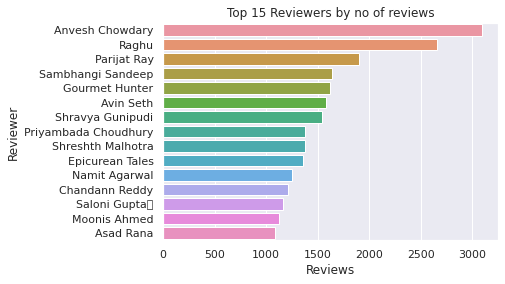

In [ ]:
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')

Text(0.5, 1.0, 'Top 15 Reviewers by no of Followers')

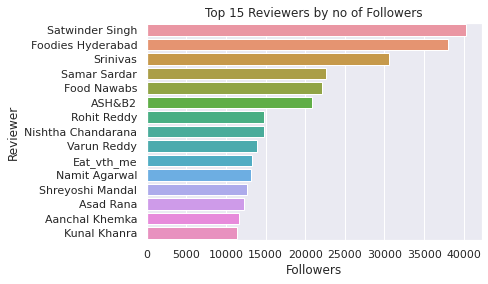

In [ ]:
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Followers')

Text(0.5, 1.0, 'Top reviewers to focus on')

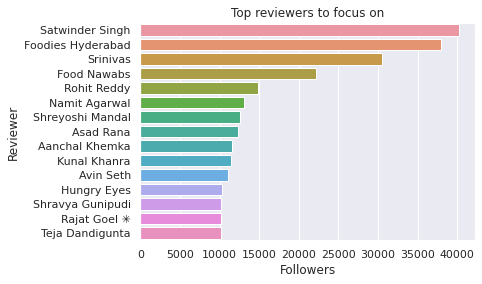

In [ ]:
most_famous_reviewer
sns.barplot(data=most_famous_reviewer, x='Followers', y='Reviewer', order=most_famous_reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top reviewers to focus on')

**these are the reviewer a restaurant should focus on who have reviewed more than 100 restaurants and have followers greater than 10000 with an average rating above 3.5**

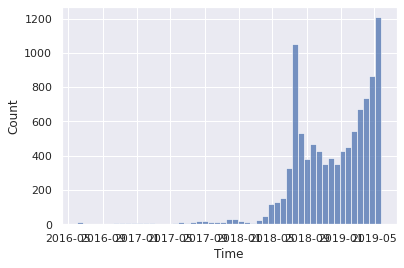

In [ ]:
sns.histplot(reviews_df.Time)

**looks like most of people started reviewing restaurant after may 2018**

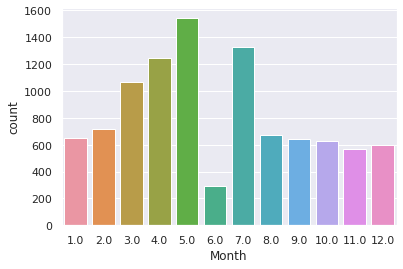

In [ ]:
sns.countplot(reviews_df.Month)

*most of the reviews are in the month of 5 and 7 month of year bold text

# **Text Pre-processing**

In [ ]:
# storing reviews in a variable for data processing
reviews=reviews_df.Review
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [ ]:
!pip install contractions

     |████████████████████████████████| 284 kB 32.4 MB/s 
     |████████████████████████████████| 106 kB 74.2 MB/s 


In [ ]:
# functions for text preprocessing 
def lower_case(text):
  '''convert the string in lower case 
  '''
  text=[x.lower() for x in text]
  return text

import string
def remove_punctuation (text):
  '''remove punctuation from the the list of strings
  '''
  text = [''.join(c for c in s if c not in string.punctuation) for s in text]
  return text

import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

def remove_all_extra_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text
  
import string
ascii_chars = set(string.printable)  # speeds things up
def remove_non_ascii_prinatble_from_list(list_of_words):
  '''removes non ascii charaters from text
  '''
  return [word for word in list_of_words 
            if all(char in ascii_chars for char in word)]

import contractions
def remove_contrations(text):
  '''shotents the words form 
  '''
  for index,x in enumerate(text):
    text[index] = contractions.fix(x)
  return text

def lemmatization_(text):
  '''converting to root words
  '''
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)

  return text
  

def Change_text(msg):
  '''Removing StopWord
  '''
  main_text=[word for word in no_punc.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

def remove_stop_words (text):
  test_2=[]
  for x in reviews:
    test_1=[]
    for i in x.split(' '):
      if i not in stop_word_list:
        test_1.append(i)
    test_2.append(' '.join(test_1))
  return test_2

In [ ]:
#download small spacy model
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 26.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
# Print the set of spaCy's default stop words and adding common words of data set
print(nlp.Defaults.stop_words)
print(nlp.vocab['-PRON-'].is_stop)

{'thereby', 'be', '‘m', 'throughout', 'least', 'becomes', 'someone', 'was', 'even', 'out', "n't", 'thence', 'beside', 'so', 'thus', 'whereafter', 'its', 'everything', 'namely', 'under', 'not', 'whether', 'formerly', 'empty', 'he', 'into', 'perhaps', 'put', 'eleven', 'third', 'beforehand', 'over', 'with', 'move', 'toward', 'some', 'a', 'full', 'cannot', 'almost', 'five', 'you', 'anyhow', 'less', 'though', 'neither', 'here', 'another', 'fifty', 'hereby', 'various', 'call', 'whoever', 'him', 'until', 'of', 'should', 'at', 'along', 'become', 'top', 'something', 'against', 'must', 'done', 'twelve', 'an', 'ourselves', 'forty', 'wherein', 'using', 'anywhere', 'say', 'us', 'onto', 'several', 'few', 'also', 'sixty', 'yourself', 'in', 'both', 'yet', 'back', 'itself', 'same', 'by', 'after', 'make', 'still', 'four', 'yours', 'does', 'your', 'regarding', 'ten', 'before', 'whole', 'when', 'meanwhile', 'all', 'her', 'any', 'became', 'seems', 'where', 'did', 'hence', 'other', 'although', 'otherwise', 

In [ ]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('-PRON-')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('pron')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

# storing nlp stop wors in a list
stop_word_list=list(nlp.Defaults.stop_words)
stop_word_list

['thereby',
 'be',
 '‘m',
 'throughout',
 'least',
 'becomes',
 'someone',
 'was',
 'even',
 'out',
 "n't",
 'thence',
 'beside',
 'so',
 'thus',
 'whereafter',
 'its',
 'everything',
 'namely',
 'under',
 'not',
 'whether',
 'formerly',
 'empty',
 'he',
 'into',
 'perhaps',
 'put',
 'eleven',
 'third',
 'beforehand',
 'over',
 'with',
 'move',
 'toward',
 'some',
 'a',
 'full',
 'cannot',
 'almost',
 'five',
 'you',
 'anyhow',
 'less',
 'though',
 'pron',
 'neither',
 'here',
 'another',
 'fifty',
 'hereby',
 'various',
 'call',
 'whoever',
 'him',
 'until',
 'of',
 'should',
 'at',
 'along',
 'become',
 'top',
 'something',
 'against',
 'must',
 'done',
 'twelve',
 'an',
 'ourselves',
 'forty',
 'wherein',
 'using',
 'anywhere',
 'say',
 'us',
 'onto',
 'several',
 'few',
 'also',
 'sixty',
 'yourself',
 'in',
 'both',
 'yet',
 'back',
 'itself',
 'same',
 'by',
 'after',
 'make',
 'still',
 'four',
 'yours',
 'does',
 'your',
 'regarding',
 'ten',
 'before',
 'whole',
 'when',
 'mea

In [ ]:
'''
convert the string in lower case, remove punctuation, non leters(numbers, emoji etc), 
extra spaces, and non ascii characters, lemmatization and removing stop words
'''
reviews=lower_case(reviews)
reviews=remove_punctuation(reviews)
reviews=remove_non_leters(reviews)
reviews=remove_all_extra_spaces(reviews)
reviews=remove_non_ascii_prinatble_from_list(reviews)
reviews=remove_contrations(reviews)
reviews=lemmatization_(reviews)
reviews=remove_stop_words(reviews)

In [ ]:
all_words=' '.join(reviews)
all_words

'ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful ambience good pleasant evening service prompt food good good experience souman da kudo service try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing soumen das arun great guy behavior sincerety good food course like visit place food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good ambiance good service good food apradeecp subro good service food good papiya good hostess ur caption good star restaurant nice place ambience different food order tasty service gud worth visit reasonable visit place read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flattering claim staff polite prompt especially pradeep suman excellent food specially like spicy food courteous staff shubro

In [ ]:
reviews

['ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful',
 'ambience good pleasant evening service prompt food good good experience souman da kudo service',
 'try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing',
 'soumen das arun great guy behavior sincerety good food course like visit place',
 'food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good',
 'ambiance good service good food apradeecp subro good service food good papiya good hostess ur caption good star restaurant',
 'nice place ambience different food order tasty service gud worth visit reasonable visit place',
 'read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flattering claim staff polite prompt especially pradeep suman',
 'excellent food specially like 

In [ ]:
# storing the reviews in a feature of df
reviews_df['Reviews']=reviews
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,ambience good food good saturday lunch cost ef...,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,ambience good pleasant evening service prompt ...,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,try great food great ambience thnx service pra...,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,soumen das arun great guy behavior sincerety g...,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick basket mutton...,2.0,2019.0,5.0,21.0


In [ ]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [ ]:
#removing words greater than 45 and less than 2
reviews_df['Reviews']=reviews_df['Reviews'].apply(lambda x:len_less_than2(x))

In [ ]:
reviews_df

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,ambience good food good saturday lunch cost ef...,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,ambience good pleasant evening service prompt ...,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,try great food great ambience thnx service pra...,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,soumen das arun great guy behavior sincerety g...,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick basket mutton...,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,2016-06-05 00:08:00,0.0,madhumathi mahajan start nice courteous server...,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2016-06-04 22:01:00,0.0,place disappoint food courteous staff serene a...,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,2016-06-03 10:37:00,3.0,bad rating mainly chicken bone find veg food a...,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,2016-05-31 17:22:00,0.0,personally love prefer chinese food couple tim...,144.0,2016.0,5.0,17.0


In [ ]:
# droping the unview column
reviews_df=reviews_df.drop('Review',axis=1)

reviews_df


,Restaurant,Reviewer,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,ambience good food good saturday lunch cost ef...,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,ambience good pleasant evening service prompt ...,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,try great food great ambience thnx service pra...,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,soumen das arun great guy behavior sincerety g...,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick basket mutton...,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,3.0,2016-06-05 00:08:00,0.0,madhumathi mahajan start nice courteous server...,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,4.5,2016-06-04 22:01:00,0.0,place disappoint food courteous staff serene a...,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,1.5,2016-06-03 10:37:00,3.0,bad rating mainly chicken bone find veg food a...,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,4.0,2016-05-31 17:22:00,0.0,personally love prefer chinese food couple tim...,144.0,2016.0,5.0,17.0



# **Performing Clustering**

In [ ]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# converting the cuisines to lower case
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : x.lower())

cuisine_df=meta_df.loc[:,['Name','Cost','Cuisines']]

In [ ]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med..."


In [ ]:
# spliting the cuisine and storing in list 
def cuisine_list(cuisines):
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

cuisine_df['cuisine']=cuisine_df['Cuisines'].apply(lambda x : cuisine_list(x))

In [ ]:
cuisine_df.head()

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...","[continental, north indian, kebab, european, s..."
1,Paradise,800,"biryani, north indian, chinese","[north indian, chinese, biryani]"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts","[north indian, desserts, mediterranean, asian]"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...","[seafood, north indian, biryani, chinese, beve..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med...","[continental, north indian, chinese, mediterra..."


In [ ]:
# Transform each element of a list-like to a row 
cuisine_df=cuisine_df.explode('cuisine')
cuisine_df.head()

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",continental
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",north indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",kebab
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",european
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",south indian


In [ ]:
# checking unique values of cuisine
set(cuisine_df["cuisine"])

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'goan',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'pizza',
 'salad',
 'seafood',
 'south indian',
 'spanish',
 'street food',
 'sushi',
 'thai',
 'wraps'}

In [ ]:
cuisine_df['cuisine']

0       continental
0      north indian
0             kebab
0          european
0      south indian
           ...     
103       fast food
104           asian
104         chinese
104       malaysian
104            thai
Name: cuisine, Length: 313, dtype: object

**Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert**

In [ ]:
# Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert
l=[]
for i in cuisine_df['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

# updating the data frame with cuisines superset
superset_cuisine=pd.DataFrame(l)
superset_cuisine.columns=['cuisine']
superset_cuisine

,cuisine
0,spicy food
1,spicy food
2,spicy food
3,Healthy food
4,Healthy food
...,...
308,fast food
309,spicy food
310,fast food
311,spicy food


In [ ]:
superset_cuisine.value_counts()

cuisine     
spicy food      135
fast food        85
Healthy food     64
Dessert          29
dtype: int64

In [ ]:
# droping the cuisine feature and creating new data frame with cuisine superset
cuisine_df.reset_index(inplace=True)
cuisine_df.drop(['cuisine'],axis=1,inplace=True)
dataset=pd.concat([cuisine_df,superset_cuisine],axis=1)
dataset.drop(['index'],axis=1,inplace=True)


**Making dummies of superset cuisines**

In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(dataset, columns=["cuisine"],prefix=None)

dum_df

,Name,Cost,Cuisines,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1
1,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1
2,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1
3,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,1,0,0
4,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,1,0,0
...,...,...,...,...,...,...,...
308,Wich Please,250,fast food,0,0,1,0
309,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",0,0,0,1
310,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",0,0,1,0
311,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",0,0,0,1


In [ ]:
cuisine=list(set(dum_df.columns)-set(['Name','Cost','Cuisines']))

cluster_df=dum_df.groupby(['Name','Cost','Cuisines'])[cuisine].sum().reset_index()


**Made dummies on the basis of cuisine_Dessert, cuisine_spicy food, cuisine_fast food, cuisine_Healthy food**

In [ ]:
cluster_df.head()

,Name,Cost,Cuisines,cuisine_fast food,cuisine_spicy food,cuisine_Healthy food,cuisine_Dessert
0,10 Downing Street,1900,"north indian, chinese, continental",1,2,0,0
1,13 Dhaba,450,north indian,0,1,0,0
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",0,1,2,0
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",0,1,2,0
4,Absolute Sizzlers,750,"continental, american, chinese",1,1,1,0


In [ ]:
cluster_data=cluster_df.drop(['Name','Cuisines'],axis=1)

cluster_data.head()

,Cost,cuisine_fast food,cuisine_spicy food,cuisine_Healthy food,cuisine_Dessert
0,1900,1,2,0,0
1,450,0,1,0,0
2,1100,0,1,2,0
3,1500,0,1,2,0
4,750,1,1,1,0


In [ ]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Cost                  105 non-null    int64
 1   cuisine_fast food     105 non-null    uint8
 2   cuisine_spicy food    105 non-null    uint8
 3   cuisine_Healthy food  105 non-null    uint8
 4   cuisine_Dessert       105 non-null    uint8
dtypes: int64(1), uint8(4)
memory usage: 1.4 KB


**Standardizing each of the features in the clusters**

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster_data_sc=sc.fit_transform(cluster_data)
cluster_data_sc

array([[ 2.04558104,  0.26513915,  0.71969146, -0.79975012, -0.45323567],
       [-0.81035397, -1.12684139, -0.28787658, -0.79975012, -0.45323567],
       [ 0.46989276, -1.12684139, -0.28787658,  1.82442995, -0.45323567],
       [ 1.2577369 , -1.12684139, -0.28787658,  1.82442995, -0.45323567],
       [-0.21947087,  0.26513915, -0.28787658,  0.51233992, -0.45323567],
       [-0.21947087,  0.26513915,  1.72725951,  0.51233992, -0.45323567],
       [-0.51491242,  1.6571197 , -1.29544463,  1.82442995, -0.45323567],
       [-1.40123708, -1.12684139, -1.29544463, -0.79975012,  2.82881571],
       [-0.71187346,  0.26513915,  0.71969146, -0.79975012, -0.45323567],
       [ 1.45469793, -1.12684139, -0.28787658, -0.79975012, -0.45323567],
       [-0.21947087,  0.26513915,  1.72725951, -0.79975012, -0.45323567],
       [-1.30275656, -1.12684139, -0.28787658, -0.79975012, -0.45323567],
       [ 1.45469793, -1.12684139, -1.29544463,  0.51233992, -0.45323567],
       [-0.31795139,  0.26513915,  0.7


**KMEANS Clustering for making clusters**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  silhouette_score

In [ ]:
# finding best cluster bu error rate
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cluster_data_sc)
    sse.append(km.inertia_)


**Using Elbow Analysis determining optimal clusters**

In [ ]:
Using Elbow Analysis determining optimal clusters

[525.0,
 382.38276523197896,
 296.33728585144047,
 255.17585016952995,
 223.6314081652107,
 196.56879122024853,
 185.92237558555462,
 172.58726615710086,
 152.06012565871993,
 139.41484246786735,
 129.31488262961108,
 125.12461570527095,
 115.26378773287277,
 103.18916567788459]

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:9]

,num_clusters,cluster_errors
0,1,525.000000
1,2,382.382765
2,3,296.337286
3,4,255.175850
4,5,223.631408
5,6,196.568791
6,7,185.922376
7,8,172.587266
8,9,152.060126


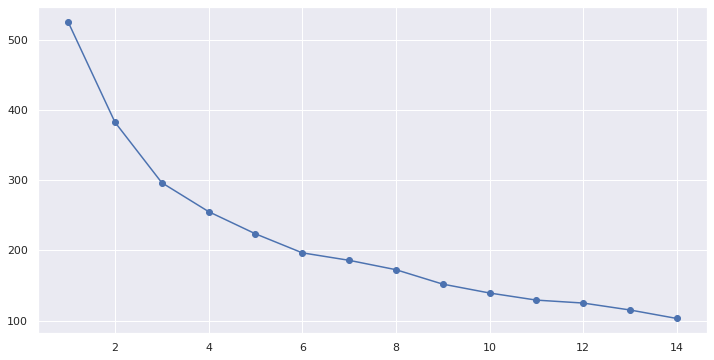

In [ ]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

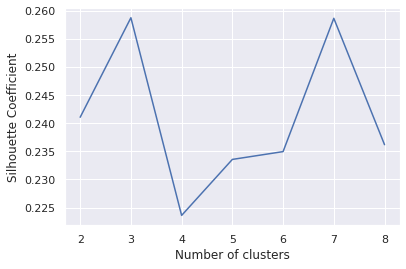

In [ ]:
#finding best cluster by silhouette score
from sklearn import metrics

k_range = range(2, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_data_sc)
    scores.append(metrics.silhouette_score(cluster_data_sc, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
X=cluster_data_sc

For n_clusters = 2 The average silhouette_score is : 0.2412012067437629
For n_clusters = 3 The average silhouette_score is : 0.25876388277001694
For n_clusters = 4 The average silhouette_score is : 0.25126065470866044
For n_clusters = 5 The average silhouette_score is : 0.2418594421516757
For n_clusters = 6 The average silhouette_score is : 0.2475970122676435
For n_clusters = 7 The average silhouette_score is : 0.2284167800607091
For n_clusters = 8 The average silhouette_score is : 0.2507022892010147
For n_clusters = 9 The average silhouette_score is : 0.26496988200964544
For n_clusters = 10 The average silhouette_score is : 0.2789398584789882
For n_clusters = 11 The average silhouette_score is : 0.30192116385060697
For n_clusters = 12 The average silhouette_score is : 0.28062340725125157
For n_clusters = 13 The average silhouette_score is : 0.3059422618429785
For n_clusters = 14 The average silhouette_score is : 0.28945440357335095
For n_clusters = 15 The average silhouette_score is :

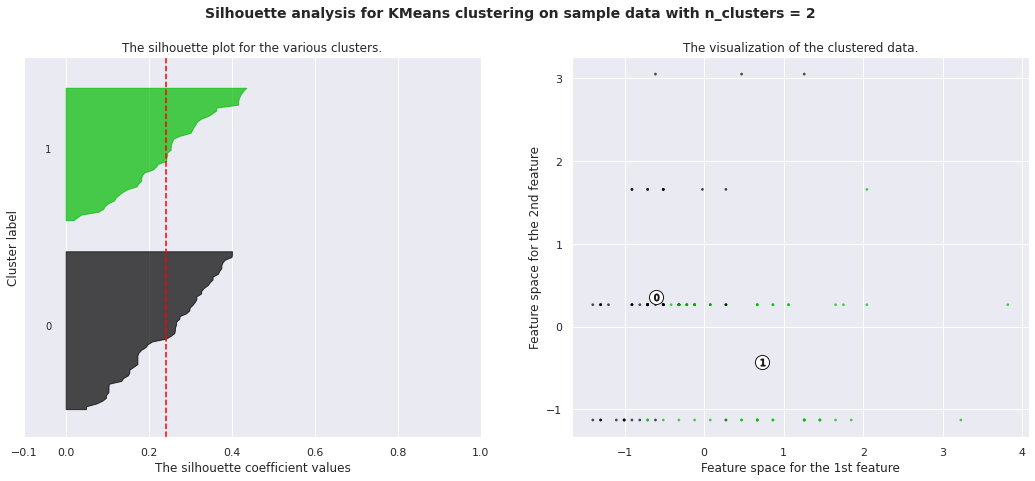

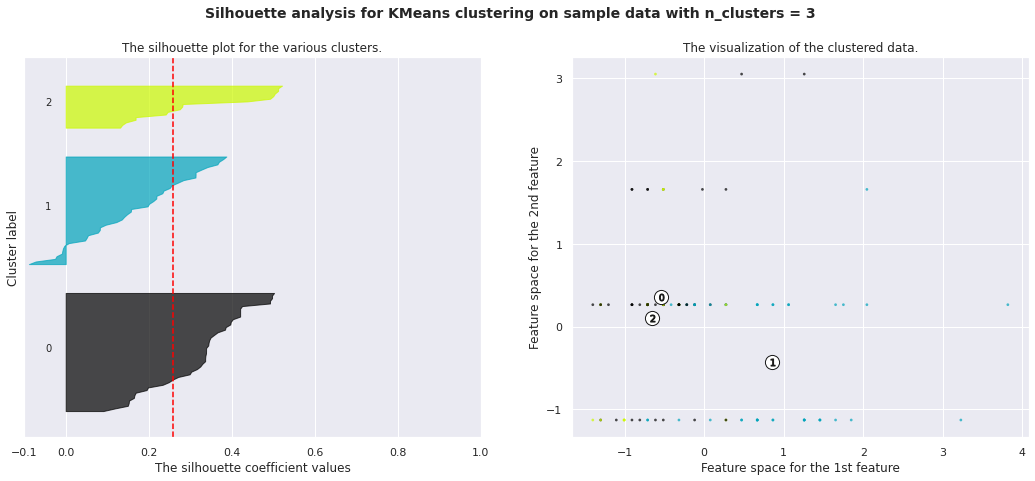

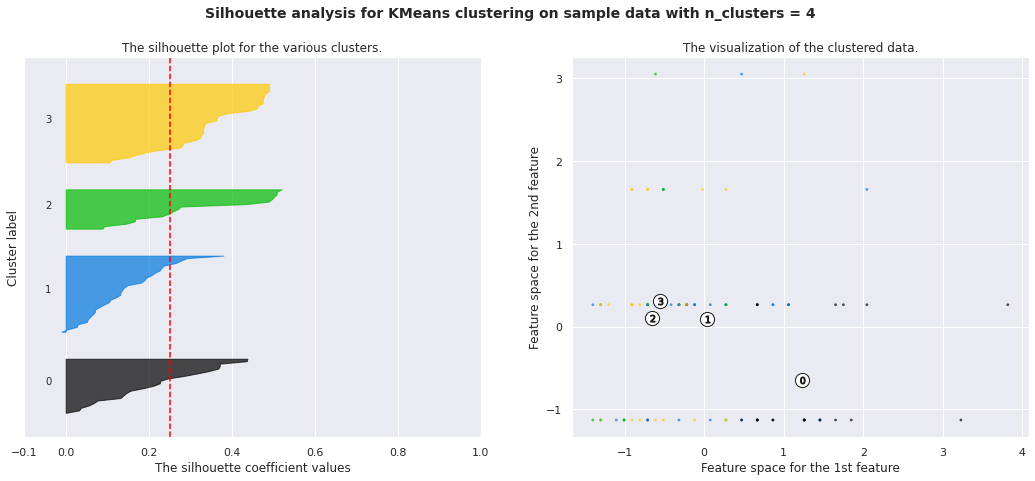

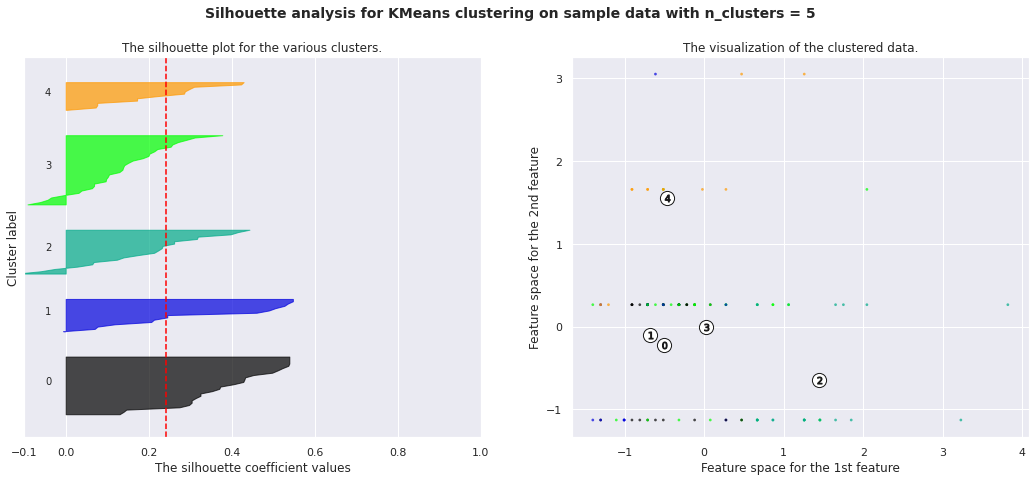

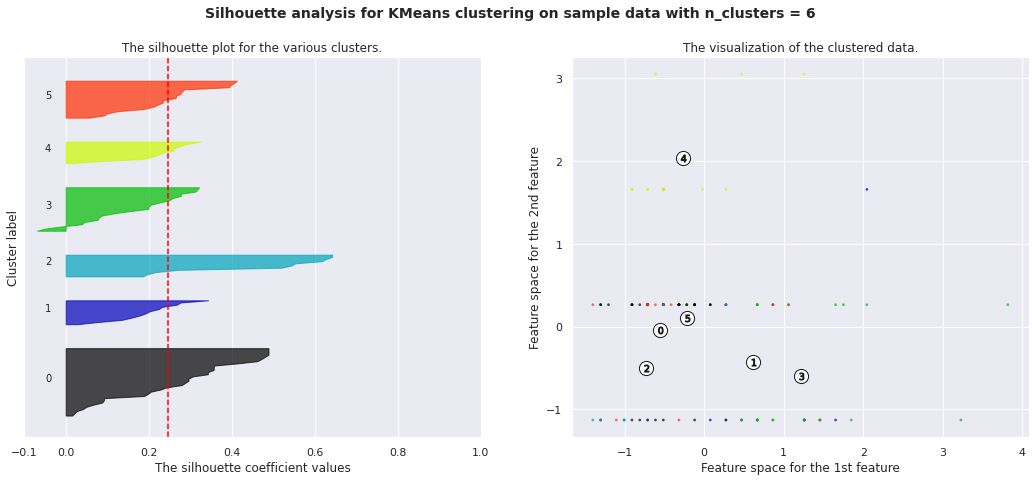

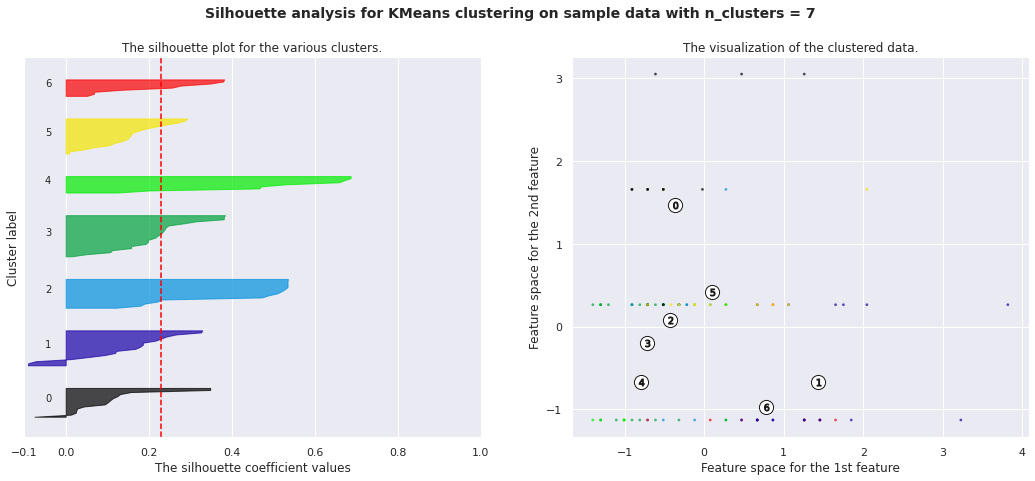

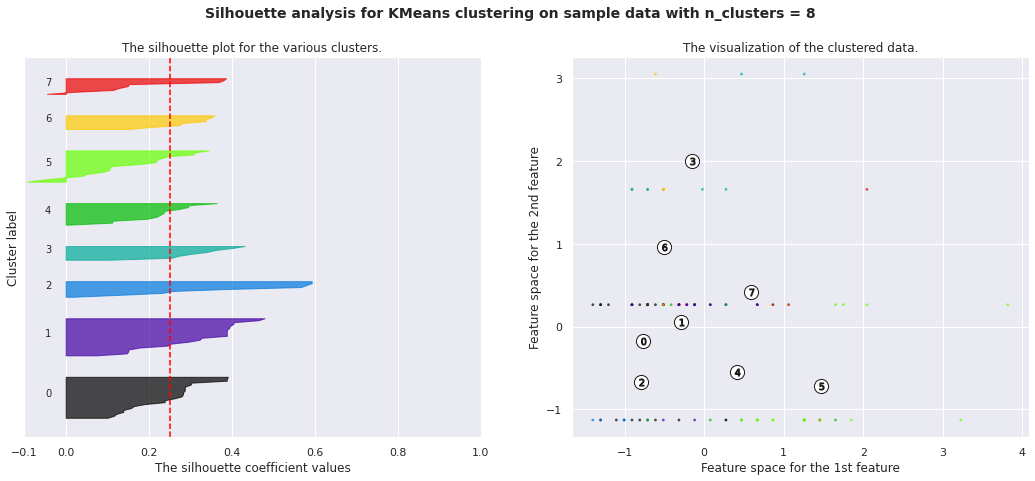

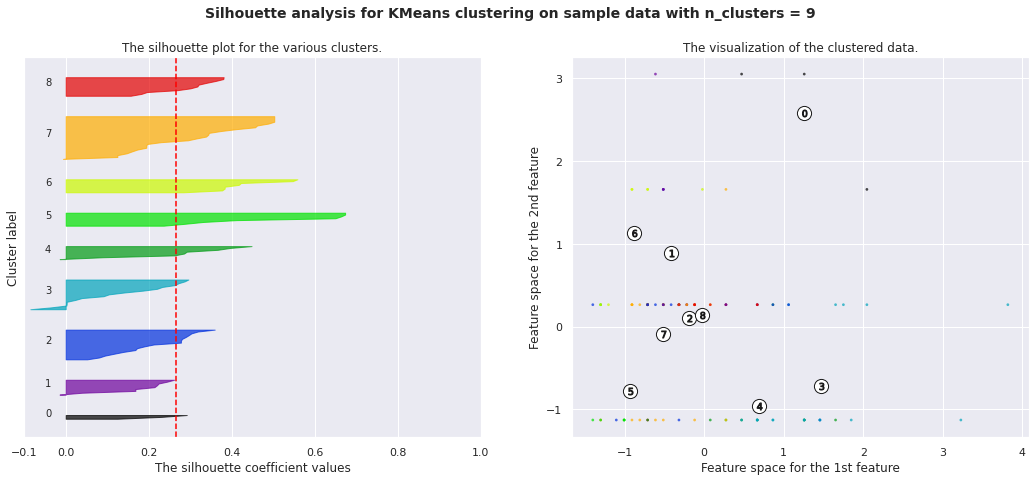

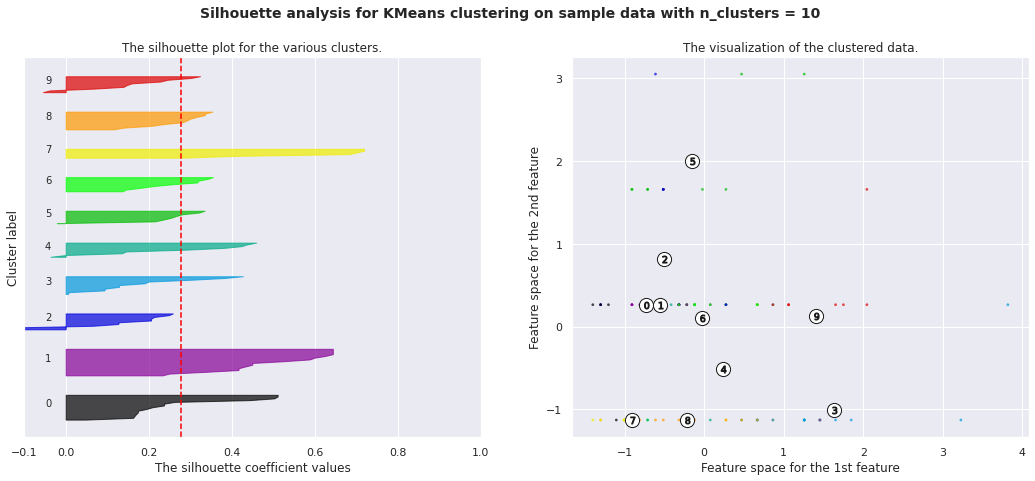

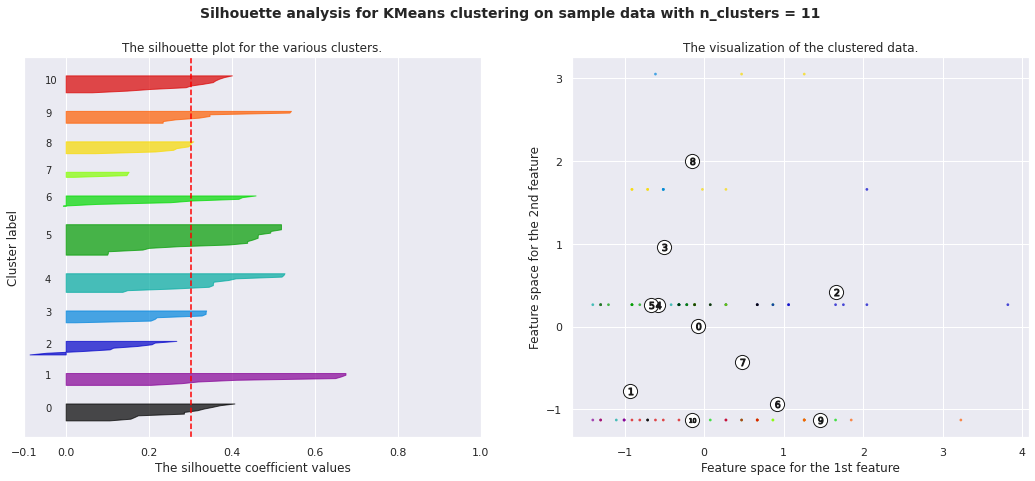

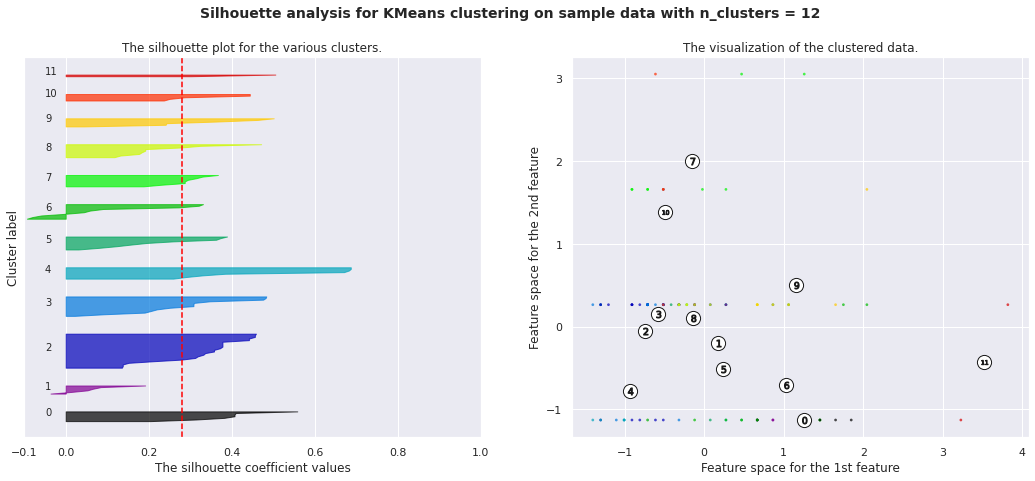

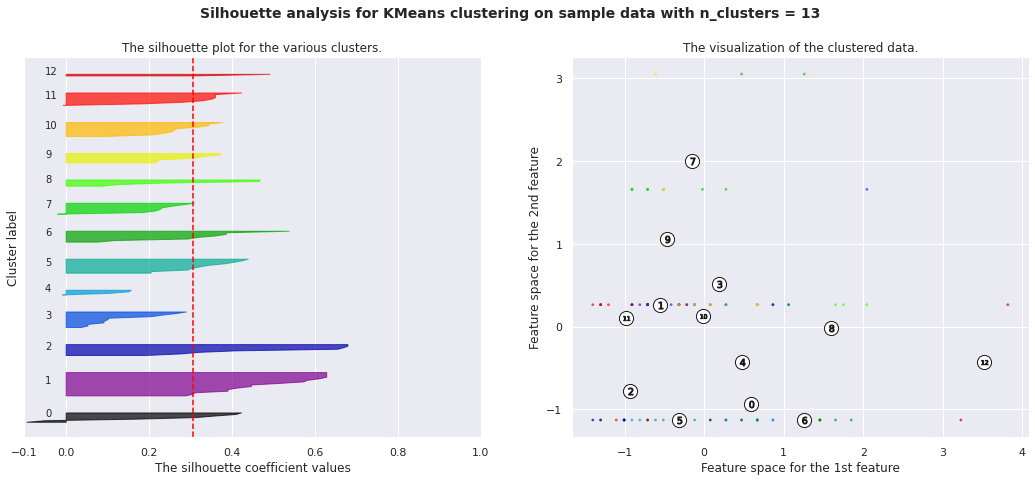

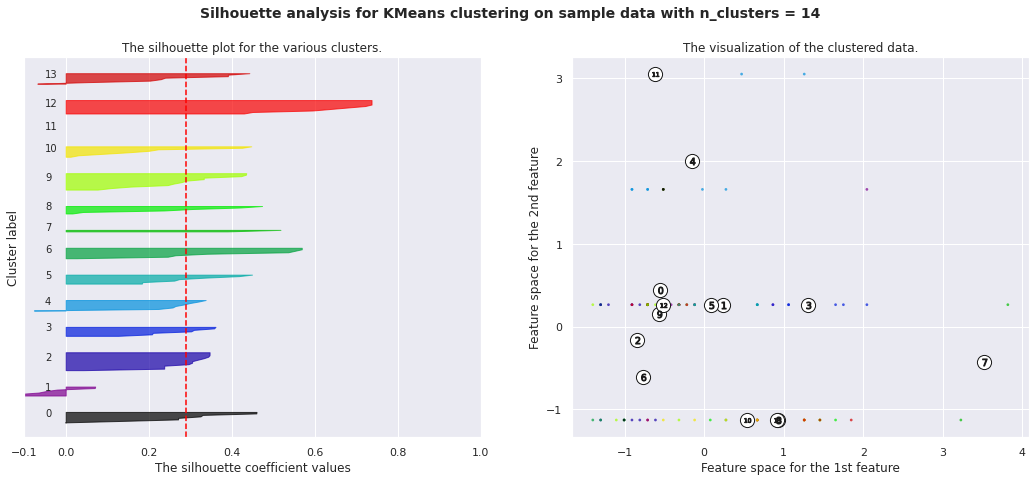

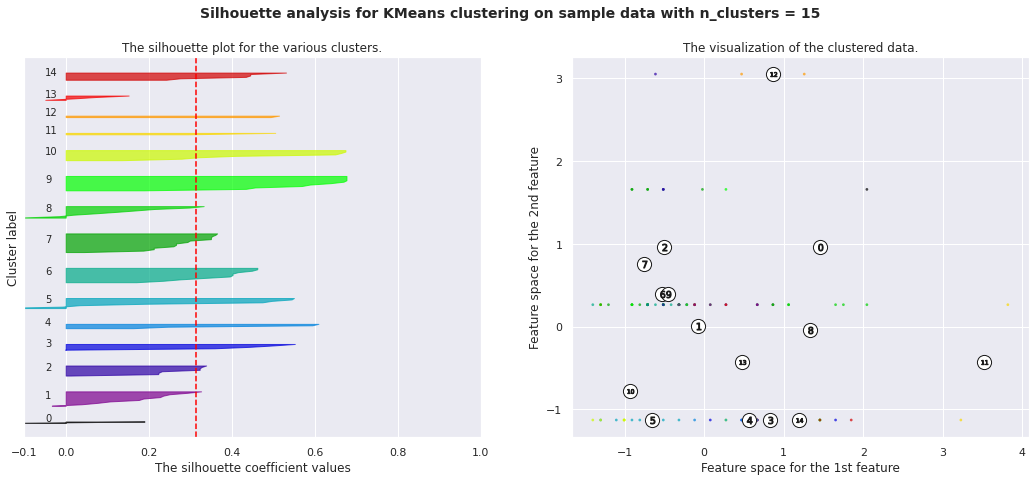

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**From silhouttee coefficients we are getting 3 as our optimum number of clusters**

In [ ]:
# finding the predicted values bu kmeans 
km = KMeans(n_clusters=3, n_init=1000, max_iter=500, random_state=1)
y_predicted = km.fit_predict(cluster_data_sc)
y_predicted

array([2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1,
       1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2], dtype=int32)

In [ ]:
# finding the total numbers of labes in each cluster
pd.Series(km.labels_).value_counts()

1    46
2    42
0    17
dtype: int64

In [ ]:
# updating the cluster values in df
cluster_df['cluster']=y_predicted
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x : x.split(", "))
exploded = cluster_df.explode("Cuisines")
exploded.head()

,Name,Cost,Cuisines,cuisine_fast food,cuisine_spicy food,cuisine_Healthy food,cuisine_Dessert,cluster
0,10 Downing Street,1900,north indian,1,2,0,0,2
0,10 Downing Street,1900,chinese,1,2,0,0,2
0,10 Downing Street,1900,continental,1,2,0,0,2
1,13 Dhaba,450,north indian,0,1,0,0,1
2,"3B's - Buddies, Bar & Barbecue",1100,north indian,0,1,2,0,2


**expracting the unique values from diffrent clusters**

In [ ]:
exploded[exploded["cluster"]==0]['Cuisines'].unique()

array(['ice cream', 'desserts', 'cafe', 'bakery', 'continental',
       'fast food', 'beverages', 'burger', 'biryani', 'north indian',
       'mughlai', 'juices', 'chinese', 'mithai', 'american', 'wraps'],
      dtype=object)

In [ ]:
exploded[exploded["cluster"]==1]['Cuisines'].unique()

array(['north indian', 'continental', 'american', 'chinese', 'fast food',
       'salad', 'burger', 'biryani', 'mughlai', 'asian', 'seafood',
       'momos', 'pizza', 'hyderabadi', 'japanese', 'sushi', 'finger food',
       'kebab', 'arabian', 'south indian', 'street food', 'lebanese',
       'andhra', 'thai', 'north eastern'], dtype=object)

In [ ]:
exploded[exploded["cluster"]==2]['Cuisines'].unique()

array(['north indian', 'chinese', 'continental', 'mediterranean',
       'european', 'seafood', 'biryani', 'hyderabadi', 'american',
       'south indian', 'andhra', 'kebab', 'bbq', 'italian', 'asian',
       'mughlai', 'beverages', 'modern indian', 'desserts', 'spanish',
       'japanese', 'salad', 'sushi', 'mexican', 'thai', 'malaysian',
       'indonesian', 'goan', 'finger food', 'healthy food'], dtype=object)

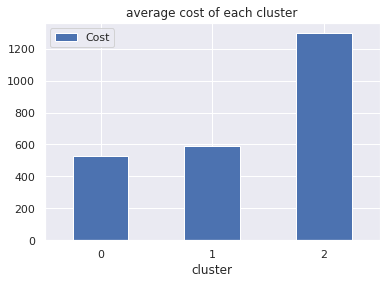

In [ ]:
# ploting average cost of each cluster
pd.DataFrame(cluster_df.groupby('cluster')['Cost'].mean()).plot(kind="bar")
plt.xticks(rotation=0)
plt.title('average cost of each cluster')
plt.show()

In [ ]:
cluster_df.loc[:,['Name','Cost','Cuisines','cluster']].head(30)

,Name,Cost,Cuisines,cluster
0,10 Downing Street,1900,"[north indian, chinese, continental]",2
1,13 Dhaba,450,[north indian],1
2,"3B's - Buddies, Bar & Barbecue",1100,"[north indian, mediterranean, european]",2
3,AB's - Absolute Barbecues,1500,"[european, mediterranean, north indian]",2
4,Absolute Sizzlers,750,"[continental, american, chinese]",1
5,Al Saba Restaurant,750,"[north indian, chinese, seafood, biryani, hyde...",2
6,American Wild Wings,600,"[american, fast food, salad, burger]",1
7,Amul,150,"[ice cream, desserts]",0
8,Angaara Counts 3,500,"[north indian, biryani, chinese]",1
9,Arena Eleven,1600,[continental],2


# **Herarchical Clustering**

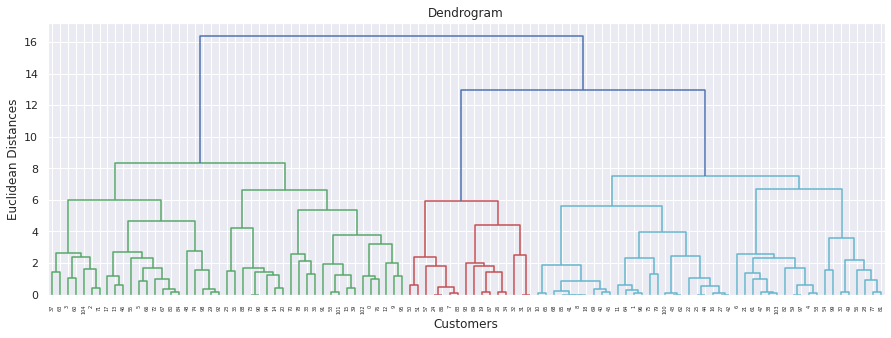

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(cluster_data_sc, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(cluster_data_sc)

cluster_df['cluster_hr']=y_hc

result=cluster_df.loc[:,['Name','Cost','Cuisines','cluster','cluster_hr']]

result.head(20)

,Name,Cost,Cuisines,cluster,cluster_hr
0,10 Downing Street,1900,"[north indian, chinese, continental]",2,0
1,13 Dhaba,450,[north indian],1,1
2,"3B's - Buddies, Bar & Barbecue",1100,"[north indian, mediterranean, european]",2,0
3,AB's - Absolute Barbecues,1500,"[european, mediterranean, north indian]",2,0
4,Absolute Sizzlers,750,"[continental, american, chinese]",1,1
5,Al Saba Restaurant,750,"[north indian, chinese, seafood, biryani, hyde...",2,0
6,American Wild Wings,600,"[american, fast food, salad, burger]",1,1
7,Amul,150,"[ice cream, desserts]",0,2
8,Angaara Counts 3,500,"[north indian, biryani, chinese]",1,1
9,Arena Eleven,1600,[continental],2,0


In [ ]:
# updating the cluster values in df
exploded_hr = result.explode("Cuisines")
exploded_hr.head()

,Name,Cost,Cuisines,cluster,cluster_hr
0,10 Downing Street,1900,north indian,2,0
0,10 Downing Street,1900,chinese,2,0
0,10 Downing Street,1900,continental,2,0
1,13 Dhaba,450,north indian,1,1
2,"3B's - Buddies, Bar & Barbecue",1100,north indian,2,0


In [ ]:
exploded_hr[exploded_hr["cluster_hr"]==0]['Cuisines'].unique()

array(['north indian', 'chinese', 'continental', 'mediterranean',
       'european', 'seafood', 'biryani', 'hyderabadi', 'american',
       'south indian', 'andhra', 'kebab', 'bbq', 'mughlai', 'italian',
       'asian', 'beverages', 'modern indian', 'desserts', 'spanish',
       'japanese', 'salad', 'sushi', 'mexican', 'bakery', 'juices',
       'thai', 'malaysian', 'indonesian', 'goan', 'finger food',
       'healthy food'], dtype=object)

In [ ]:
exploded_hr[exploded_hr["cluster_hr"]==1]['Cuisines'].unique()

array(['north indian', 'continental', 'american', 'chinese', 'fast food',
       'salad', 'burger', 'biryani', 'mughlai', 'asian', 'seafood',
       'momos', 'pizza', 'hyderabadi', 'japanese', 'sushi', 'finger food',
       'kebab', 'arabian', 'south indian', 'street food', 'lebanese',
       'italian', 'thai', 'north eastern'], dtype=object)

In [ ]:
exploded_hr[exploded_hr["cluster_hr"]==2]['Cuisines'].unique()

array(['ice cream', 'desserts', 'cafe', 'bakery', 'continental',
       'fast food', 'beverages', 'burger', 'biryani', 'mithai',
       'american', 'wraps'], dtype=object)


# **Sentiment Analysis ( UnSupervised )**


**Tokenization**

In [ ]:
# setting tokens by TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(stop_words=stop_word_list)
transformed_reviews=tfidf.fit_transform(reviews_df['Reviews'])


# **LDA**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV

# LDA model
lda = LatentDirichletAllocation(n_components=5)
lda.fit(transformed_reviews)

LatentDirichletAllocation(n_components=5)

In [ ]:
lda.components_

array([[0.20003194, 0.20009385, 0.200071  , ..., 0.2000448 , 0.20003833,
        0.20001265],
       [0.20003796, 0.20010633, 0.20008242, ..., 0.20005658, 0.20004535,
        0.38318241],
       [0.20003101, 0.20011554, 0.20006625, ..., 0.20006466, 0.20003734,
        0.20001244],
       [0.45217364, 0.20004187, 0.20003347, ..., 0.93708633, 0.20163567,
        0.2000797 ],
       [0.20085546, 0.44766776, 0.30429118, ..., 0.2010523 , 0.60932248,
        0.20000272]])

In [ ]:
# checking for top 15 words in each topic
for index,topic in enumerate(lda.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['nan', 'food', 'salt', 'service', 'kurkure', 'kodi', 'happy', 'excellent', 'oily', 'poor', 'packing', 'ghouse', 'shah', 'gud', 'momo']


THE TOP 15 WORDS FOR TOPIC #1
['khan', 'temptey', 'suck', 'pepsi', 'salty', 'nyc', 'waste', 'nom', 'qty', 'dharma', 'super', 'man', 'delivery', 'tasty', 'fast']


THE TOP 15 WORDS FOR TOPIC #2
['chokha', 'stag', 'deliver', 'cold', 'awsome', 'test', 'boy', 'spicy', 'taste', 'late', 'food', 'service', 'bad', 'delivery', 'good']


THE TOP 15 WORDS FOR TOPIC #3
['love', 'taste', 'amazing', 'service', 'order', 'try', 'ice', 'super', 'chocolate', 'food', 'cream', 'place', 'good', 'cake', 'excellent']


THE TOP 15 WORDS FOR TOPIC #4
['like', 'try', 'visit', 'biryani', 'ambience', 'great', 'time', 'nice', 'taste', 'chicken', 'service', 'order', 'place', 'food', 'good']




In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 23.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=f7ee372534117bdcfc57ee7572363b6f8ecfe65be466f68fff06054aa0568e52
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
# ploting the clusters top 30 terms 
lda_panel = pyLDAvis.sklearn.prepare(lda, transformed_reviews,tfidf,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  67.847292
3       51.163364 -159.968018       2        1  13.924707
2      -73.144554   21.523815       3        1   6.697920
0      -66.410133 -110.606438       4        1   6.214540
1       54.417324   12.443444       5        1   5.315542, topic_info=           Term        Freq       Total Category  logprob  loglift
5550       good  619.000000  619.000000  Default  30.0000  30.0000
3496   delivery  104.000000  104.000000  Default  29.0000  29.0000
1059        bad  150.000000  150.000000  Default  28.0000  28.0000
12014   service  241.000000  241.000000  Default  27.0000  27.0000
4923       food  379.000000  379.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
13196     super    2.287404   40.898258   Topic5  -6.7495   0.0509
11678     salty    1.214395    9.288659   Topic5  -7.3827   0.9000
13636     testy    0.817996    2.489016   Topic5  -7.7778   1.8217
14804     waste    1.431406   30.406865   Topic5  -7.2183  -0.1215
3075      crazy    0.820574    8.440465   Topic5  -7.7747   0.6037

[312 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
291        1  0.251697     ali
291        4  0.503393     ali
304        4  0.595883   allah
329        1  0.275282   allow
329        2  0.137641   allow
...      ...       ...     ...
15139      4  0.567498  yamuna
15170      5  0.881027   yfjgz
15194      4  0.564670    yuck
15246      3  0.515483    zara
15272      5  0.838622  zomoto

[419 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 2])

In [ ]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(transformed_reviews)
reviews_df['sentiments']=topic_results.argmax(axis=1)
reviews_df.head()

,Restaurant,Reviewer,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,sentiments
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,ambience good food good saturday lunch cost ef...,2.0,2019.0,5.0,15.0,4
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,ambience good pleasant evening service prompt ...,2.0,2019.0,5.0,14.0,4
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,try great food great ambience thnx service pra...,3.0,2019.0,5.0,22.0,3
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,soumen das arun great guy behavior sincerety g...,1.0,2019.0,5.0,22.0,0
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick basket mutton...,2.0,2019.0,5.0,21.0,4


In [ ]:
reviews_df['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [ ]:
reviews_df.shape

(9954, 11)

In [ ]:
reviews_df[reviews_df['sentiments']==4 ]['Rating'].value_counts()

5.0    2681
4.0    2035
1.0    1440
3.0    1034
2.0     581
4.5      40
3.5      34
2.5      17
1.5       9
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    510
4.0    214
1.0    147
3.0     79
2.0     45
4.5     29
3.5     13
2.5      2
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['sentiments']==2 ]['Rating'].value_counts()

5.0    446
1.0     97
4.0     90
3.0     39
2.0     33
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['sentiments']==1 ]['Rating'].value_counts()

5.0    82
1.0    14
3.0    10
2.0     8
4.0     7
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['sentiments']==0 ]['Rating'].value_counts()

5.0    107
1.0     37
3.0     30
4.0     27
2.0     17
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['Rating']==3].shape

(1192, 11)


# **Non-negative matrix Factorization**

In [ ]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=5,random_state=42)

nmf_model.fit(transformed_reviews)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

NMF(n_components=5, random_state=42)

In [ ]:
# top most frequnt word used in each topic
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['packing', 'polite', 'test', 'quality', 'quantity', 'price', 'ambiance', 'ambience', 'spicy', 'burger', 'job', 'food', 'taste', 'service', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['serve', 'excellent', 'try', 'friend', 'amazing', 'love', 'time', 'awesome', 'staff', 'visit', 'ambience', 'great', 'service', 'place', 'food']


THE TOP 15 WORDS FOR TOPIC #2
['music', 'sarvice', 'ambiance', 'service', 'overall', 'family', 'hangout', 'enjoy', 'thank', 'staff', 'ambience', 'place', 'friend', 'friendly', 'nice']


THE TOP 15 WORDS FOR TOPIC #3
['zomato', 'thank', 'person', 'awesome', 'guy', 'super', 'excellent', 'order', 'boy', 'quick', 'late', 'deliver', 'fast', 'time', 'delivery']


THE TOP 15 WORDS FOR TOPIC #4
['spicy', 'piece', 'try', 'paneer', 'veg', 'restaurant', 'like', 'quality', 'rice', 'quantity', 'biryani', 'bad', 'order', 'taste', 'chicken']




In [ ]:
topic_results = nmf_model.transform(transformed_reviews)

reviews_df['sentiments']=topic_results.argmax(axis=1)

reviews_df[reviews_df['sentiments']==4]['Rating'].value_counts()

1.0    1087
4.0     671
5.0     536
3.0     467
2.0     361
3.5      25
4.5      18
1.5       7
2.5       6
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    285
1.0     98
4.0     66
3.0     38
2.0     25
4.5      3
3.5      2
2.5      1
Name: Rating, dtype: int64

In [ ]:
reviews_df.Reviews[1]

'ambience good pleasant evening service prompt food good good experience souman kudo service'

In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,sentiments
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,ambience good food good saturday lunch cost ef...,2.0,2019.0,5.0,15.0,0
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,ambience good pleasant evening service prompt ...,2.0,2019.0,5.0,14.0,0
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,try great food great ambience thnx service pra...,3.0,2019.0,5.0,22.0,1
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,soumen das arun great guy behavior sincerety g...,1.0,2019.0,5.0,22.0,1
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick basket mutton...,2.0,2019.0,5.0,21.0,0


In [ ]:
reviews_df['sentiments']=reviews_df['sentiments'].apply( lambda x : 'negative' if x==4 or x==3 else 'positive')

reviews_df[reviews_df['sentiments']=='negative']["Rating"].value_counts()

1.0    1185
5.0     821
4.0     737
3.0     505
2.0     386
3.5      27
4.5      21
2.5       7
1.5       7
Name: Rating, dtype: int64

In [ ]:
reviews_df[reviews_df['sentiments']=='positive']["Rating"].value_counts()

5.0    3005
4.0    1636
3.0     687
1.0     550
2.0     298
4.5      48
3.5      20
2.5      12
1.5       2
Name: Rating, dtype: int64

# **Sentiment Analysis (Superviesd)**

**data Processing**

In [ ]:
def sentiment(rating):
  if rating >=3.5:
    return 0 
    # positive sentiment
  else:
    return 1
    # neagative sentiment

sentiment_df=reviews_df[['Reviews','Rating']]

sentiment_df['sentiment']=sentiment_df['Rating'].apply(lambda x:sentiment(x))
sentiment_df

,Reviews,Rating,sentiment
0,ambience good food good saturday lunch cost ef...,5.0,0
1,ambience good pleasant evening service prompt ...,5.0,0
2,try great food great ambience thnx service pra...,5.0,0
3,soumen das arun great guy behavior sincerety g...,5.0,0
4,food goodwe order kodi drumstick basket mutton...,5.0,0
...,...,...,...
9995,madhumathi mahajan start nice courteous server...,3.0,1
9996,place disappoint food courteous staff serene a...,4.5,0
9997,bad rating mainly chicken bone find veg food a...,1.5,1
9998,personally love prefer chinese food couple tim...,4.0,0


In [ ]:
# defining blank list for the input of scores of models
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]
model_train_time=[]

In [ ]:
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  #storing the start time of model training
  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  #storing the time when the model ended trining 
  stop = time.time()
  #calculating the total time taken for model training 
  time_min=round((stop - start)/60,4)
  # printing the time taken to train the model
  print(f"Training time: {time_min}min")
  model_train_time.append(time_min)
  
  

  # finding the best parameters of the model if any 
  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass
  # finding best score of the model 
  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (actual,predicted,append=True):
    '''
    calcuating diffrent score matrix of the model
    '''
    # calculating accuracy score
    accuracy = accuracy_score(actual,predicted)
    # calculating precision score
    precision = precision_score(actual,predicted)
    # calculating recall score
    recall = recall_score(actual,predicted)
    # calculating f1_score score
    f1 = f1_score(actual,predicted)
    # calculating roc_auc_score score
    roc= roc_auc_score(actual,predicted)
    
    # printing all the scores
    print("\tThe accuracy is ", accuracy)
    print("\tThe precision is ", precision)
    print("\tThe recall is ", recall)
    print("\tThe f1 is ", f1)
    print('\tthe auc  is ',roc,'\n')
    print('\t\t\t\tclassification report\n','*'*80,'\n',classification_report(actual,predicted))
    

    # uploading all the score of the matrix in in the list 
    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass
# printing the score by the help of coustom score function
  # for train set
  print('\t\t\t\tscore matrix for train')
  print('*'*80)
  score(y_train,y_pred_train,False)
  print('\n')
  # for test set
  print('\t\t\t\tscore matrix for test')
  print('*'*80)
  score(y_test,y_pred_test)

In [ ]:
# creating x and y varibles for independent and dependent variable
x = sentiment_df['Reviews']
y = sentiment_df['sentiment']

In [ ]:
# spliting the data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=sentiment_df['sentiment'])

In [ ]:
# creating topkens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",min_df=0.01,max_df=0.95)
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


# **MultinomialNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()
# training and evaluating the MultinomialNB
train_and_score(model,X_test,X_train,y_test,y_train)

Training time: 0.0002min
				score matrix for train
********************************************************************************
	The accuracy is  0.8377762893503015
	The precision is  0.8761149653121902
	The recall is  0.6478563576401613
	The f1 is  0.7448915104276385
	the auc  is  0.7975345977389995 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      4736
           1       0.88      0.65      0.74      2729

    accuracy                           0.84      7465
   macro avg       0.85      0.80      0.81      7465
weighted avg       0.84      0.84      0.83      7465



				score matrix for test
********************************************************************************
	The accuracy is  0.8324628364805142
	The precision is  0.8763358778625954
	The recall is  0.6307692307692307
	The f1 is  0.7335463258785943
	the


# **Desision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
train_and_score(DecisionTree,X_test, X_train, y_test, y_train)

Training time: 0.0047min
				score matrix for train
********************************************************************************
	The accuracy is  0.7847287340924314
	The precision is  0.8532745591939547
	The recall is  0.4965188713814584
	The f1 is  0.6277507528376187
	the auc  is  0.7236606181231616 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.77      0.95      0.85      4736
           1       0.85      0.50      0.63      2729

    accuracy                           0.78      7465
   macro avg       0.81      0.72      0.74      7465
weighted avg       0.80      0.78      0.77      7465



				score matrix for test
********************************************************************************
	The accuracy is  0.7677782241864203
	The precision is  0.8132075471698114
	The recall is  0.4736263736263736
	The f1 is  0.5986111111111111
	the


# **lightGBM**

In [ ]:
import lightgbm as lgb

lgbc=lgb.LGBMClassifier()

# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [15,20,25]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

# training and evaluating the lgbr_grid
train_and_score(lgbc_grid,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training time: 0.7908min
The best parameters found out to be : {'max_depth': 25, 'n_estimators': 100}
 
where negative mean squared error is:  0.7636492220650637 

				score matrix for train
********************************************************************************
	The accuracy is  0.9220361687876758
	The precision is  0.9040270982310877
	The recall is  0.8801758886038842
	The f1 is  0.8919420720386185
	the auc  is  0.9131664915992393 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      4736
           1       0.90      0.88      0.89      2729

    accuracy                           0.92      7465
   macro avg       0.92      0.91      0.92      7465
weighted avg       0.92      0.92      0.92      7465



				score matrix for test
***************************

# **Conclusion**

Based on the silhouette score plot and elbow plot, we decided on 3 clusters that were grouped using KMeans clustering and Hierarchical clustering.
Best models we found for sentiment analysis(Supervised) are Lightgbm and decision tree